## 다음의 코드에서는 picher의 승수를 예측하는 코드를 작성하였음.

In [36]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [37]:
# picher와 batter 데이터 불러오기

picher_file_path = '../data/picher_stats_2017.csv'
batter_file_path = '../data/batter_stats_2017.csv'
picher = pd.read_csv(picher_file_path)
batter = pd.read_csv(batter_file_path)

In [38]:
# pandas 형태로 정의된 데이터를 출력할 때, scientific-notation이 아닌 float 모양으로 출력되게 해줍니다.
pd.options.mode.chained_assignment = None

In [39]:
# 피처 각각에 대한 scaling을 수행하는 함수를 정의합니다.
def standard_scaling(df, scale_columns):
    for col in scale_columns:
#       print(col)
#        print(df[col].dtype)
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

In [40]:
# 피처 각각에 대한 scaling을 수행합니다.
scale_columns = ['패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)']
picher_df = standard_scaling(picher, scale_columns)

In [41]:
picher_df = picher_df.rename(columns={'승': 'y'})
picher_df.head(5)

,선수명,팀명,y,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,11,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,20,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,10,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,13,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


In [42]:
# 팀명 피처를 one-hot encoding으로 변환합니다.
team_encoding = pd.get_dummies(picher_df['팀명'])
picher_df = picher_df.drop('팀명', axis=1)
picher_df = picher_df.join(team_encoding)

In [43]:
picher_df.head()

,선수명,y,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,켈리,16,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,...,2.734705,0,0,0,0,1,0,0,0,0
1,소사,11,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,...,1.337303,0,0,1,0,0,0,0,0,0
2,양현종,20,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,...,5.329881,1,0,0,0,0,0,0,0,0
3,차우찬,10,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,...,3.333592,0,0,1,0,0,0,0,0,0
4,레일리,13,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,...,2.734705,0,0,0,0,0,0,1,0,0


In [44]:
!pip install scikit-learn

In [45]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# 학습 데이터와 테스트 데이터로 분리합니다.
X = picher_df[picher_df.columns.difference(['선수명', 'y'])]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [46]:
# 회귀 분석 계수를 학습합니다 (회귀 모델 학습)
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [47]:
print(lr.coef_)

[-3.78371316e-02  8.35855415e-02 -8.92433722e+00  5.43697502e-02
 -6.03354694e-01 -1.13601604e-01 -1.99557510e-02 -5.99150878e-02
  1.10857604e+00 -1.74804529e-01  2.20192271e-01  7.86166517e+00
  7.43426014e-01  6.33521285e-01  5.69419469e-01  4.23808083e-01
  4.09429348e-01  4.33341372e-02  8.56058237e-01  1.29247039e-02
 -6.28873373e-01  8.46064897e-02  1.99787268e-06  1.58963462e+00
  3.17882545e-01 -3.48968727e-01 -3.27119949e-01  1.35862961e+00]


In [48]:
picher_df.columns

Index(['선수명', 'y', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9',
       '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)', 'KIA', 'KT', 'LG', 'NC', 'SK', '두산', '롯데', '삼성',
       '한화'],
      dtype='object')

In [49]:
!pip install statsmodels

In [50]:
import statsmodels.api as sm

# statsmodel 라이브러리로 회귀 분석을 수행합니다.
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     22.31
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           8.74e-30
Time:                        11:02:45   Log-Likelihood:                -205.01
No. Observations:                 121   AIC:                             466.0
Df Residuals:                      93   BIC:                             544.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8608      0.339      8.440      0.000       2.188       3.534
BABIP         -0.0378      0.236     -0.161      0.873      -0.506       0.430
ERA            0.0836      0.420      0.199      0.843      -0.750       0.918
FIP           -8.9243     17.118     -0.521      0.603     -42.918      25.069
KIA            0.3722      0.402      0.926      0.357      -0.426       1.170
KT            -0.2855      0.386     -0.740      0.461      -1.052       0.481
LG             0.2043      0.435      0.470      0.640      -0.659       1.068
LOB%          -0.0200      0.284     -0.070      0.944      -0.584       0.544
NC             0.2580      0.482      0.535      0.594      -0.699       1.215
RA9-WAR        1.1086      0.523      2.120      0.037       0.070       2.147
SK             0.1431      0.409      0.350      0.727      -0.668       0.954
WAR            0.2202      0.496      0.444      0.658      -0.765       1.206
kFIP           7.8617     14.433      0.545      0.587     -20.800      36.523
경기             0.7434      0.531      1.401      0.164      -0.310       1.797
두산             0.9514      0.464      2.050      0.043       0.030       1.873
롯데             0.8873      0.462      1.919      0.058      -0.031       1.805
볼넷/9           0.4238      1.143      0.371      0.712      -1.846       2.693
블론             0.4094      0.222      1.845      0.068      -0.031       0.850
삼성             0.3612      0.449      0.804      0.423      -0.531       1.253
삼진/9           0.8561      1.319      0.649      0.518      -1.762       3.474
선발             0.0129      0.997      0.013      0.990      -1.966       1.992
세             -0.6289      0.225     -2.794      0.006      -1.076      -0.182
연봉(2017)       0.0846      0.426      0.199      0.843      -0.761       0.930
연봉(2018)    1.998e-06   1.88e-05      0.107      0.915   -3.52e-05    3.92e-05
이닝             1.5896      1.187      1.340      0.184      -0.767       3.946
패              0.3179      0.349      0.910      0.365      -0.376       1.012
한화            -0.0311      0.407     -0.077      0.939      -0.838       0.776
홀드            -0.3271      0.295     -1.110      0.270      -0.912       0.258
홈런/9           1.3586      3.048      0.446      0.657      -4.694       7.412
==============================================================================
Omnibus:                        1.205   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.548   Jarque-Bera (JB):                0.779
Skew:                           0.160   Prob(JB):                        0.678
Kurtosis:                       3.230   Cond. No.                     6.79e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

[Text(0, 0, 'const'),
 Text(1, 0, 'BABIP'),
 Text(2, 0, 'ERA'),
 Text(3, 0, 'FIP'),
 Text(4, 0, 'KIA'),
 Text(5, 0, 'KT'),
 Text(6, 0, 'LG'),
 Text(7, 0, 'LOB%'),
 Text(8, 0, 'NC'),
 Text(9, 0, 'RA9-WAR'),
 Text(10, 0, 'SK'),
 Text(11, 0, 'WAR'),
 Text(12, 0, 'kFIP'),
 Text(13, 0, '경기'),
 Text(14, 0, '두산'),
 Text(15, 0, '롯데'),
 Text(16, 0, '볼넷/9'),
 Text(17, 0, '블론'),
 Text(18, 0, '삼성'),
 Text(19, 0, '삼진/9'),
 Text(20, 0, '선발'),
 Text(21, 0, '세'),
 Text(22, 0, '연봉(2017)'),
 Text(23, 0, '연봉(2018)'),
 Text(24, 0, '이닝'),
 Text(25, 0, '패'),
 Text(26, 0, '한화'),
 Text(27, 0, '홀드'),
 Text(28, 0, '홈런/9')]

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

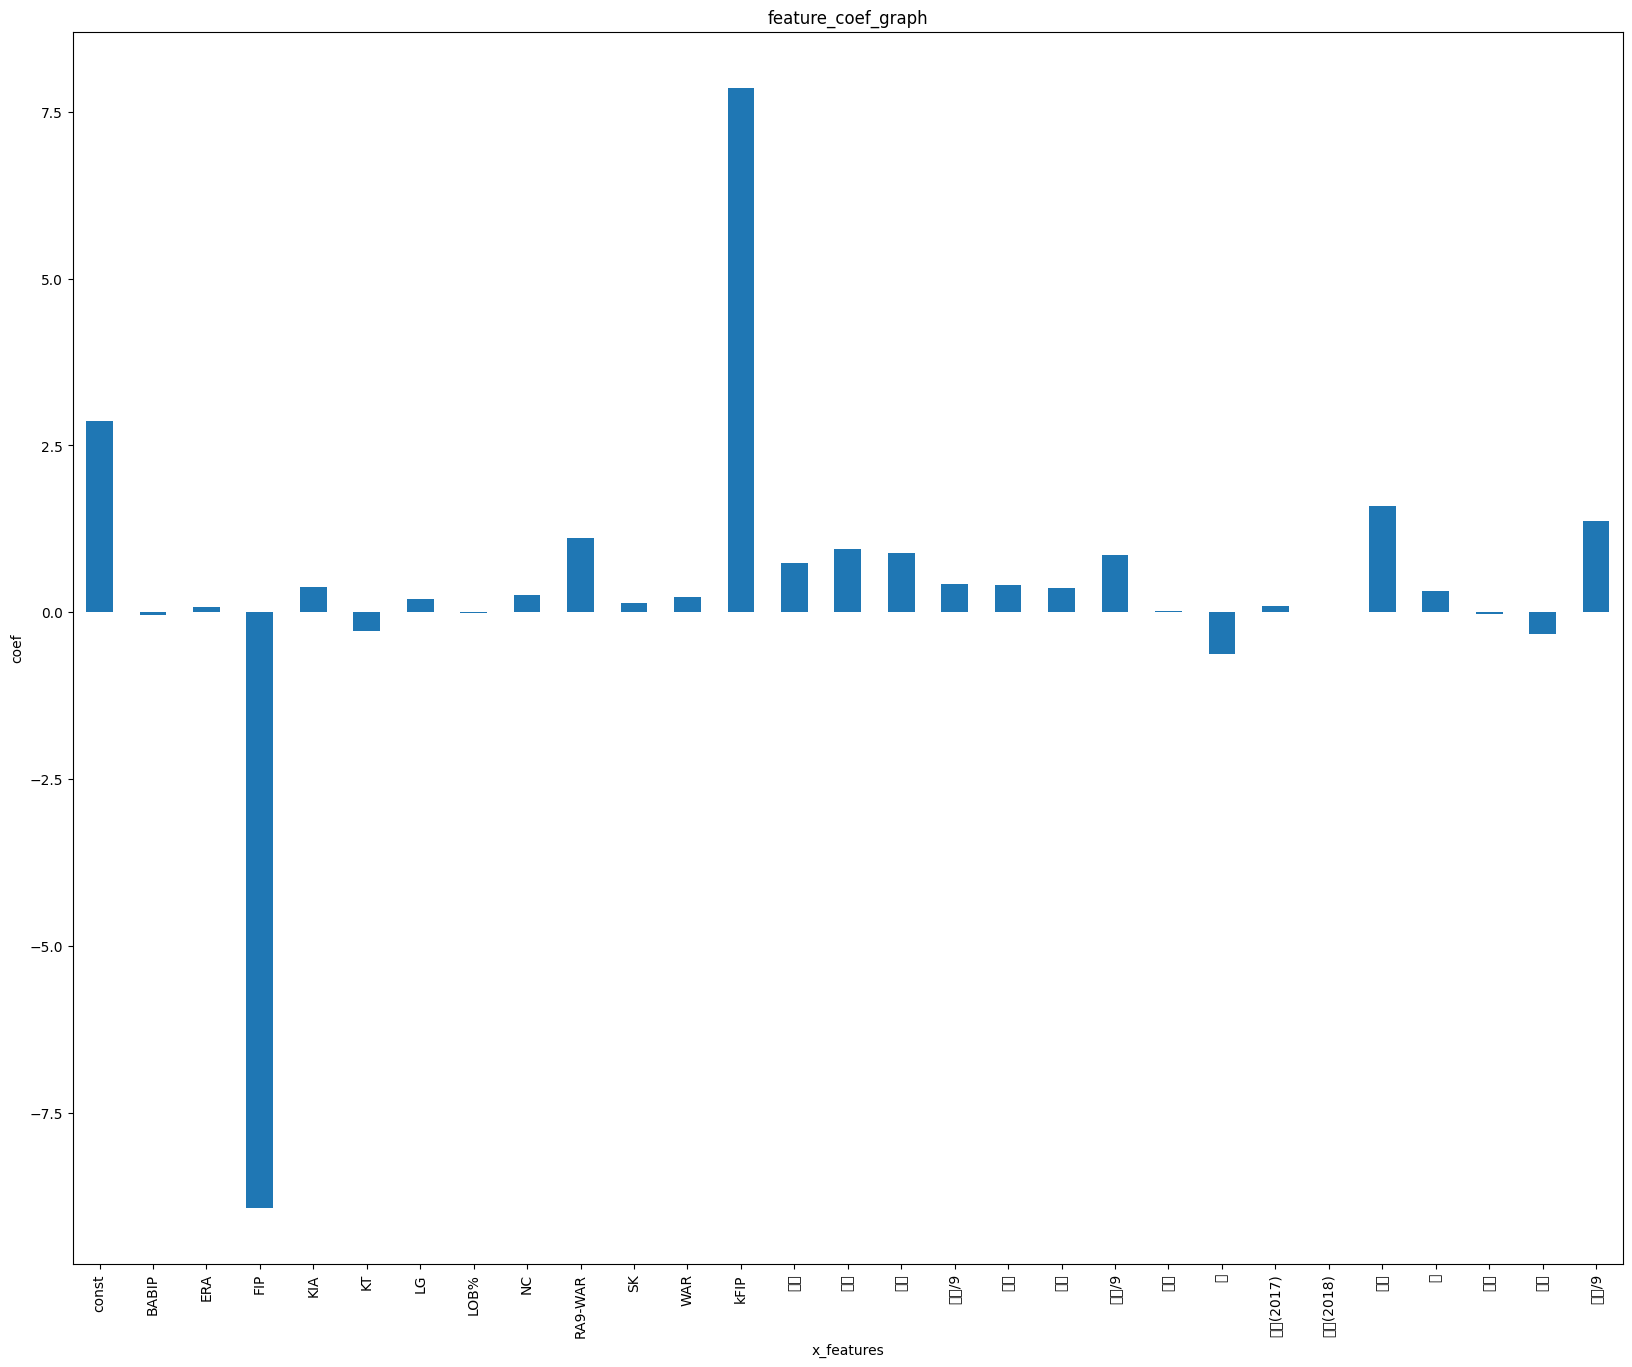

In [52]:
import matplotlib as mpl

# 한글 출력을 위한 사전 설정 단계입니다.
mpl.rc('font', family='AppleGothic')
plt.rcParams['figure.figsize'] = [20, 16]

# 회귀 계수를 리스트로 반환합니다.
coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

# 변수명을 리스트로 반환합니다.
x_labels = model.params.index.tolist()

# 회귀 계수를 출력합니다.
ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

In [54]:
# 학습 데이터와 테스트 데이터로 분리합니다.
X = picher_df[picher_df.columns.difference(['선수명', 'y'])]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [55]:
# 회귀 분석 모델을 학습합니다.
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [56]:
# 회귀 분석 모델을 평가합니다.
print(model.score(X_train, y_train)) # train R2 score를 출력합니다.
print(model.score(X_test, y_test)) # test R2 score를 출력합니다.

0.8662713501306332
0.8494695533284429


In [57]:
# 회귀 분석 모델을 평가합니다.
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력합니다.
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력합니다.

1.3170316229123382
1.8096140285934972


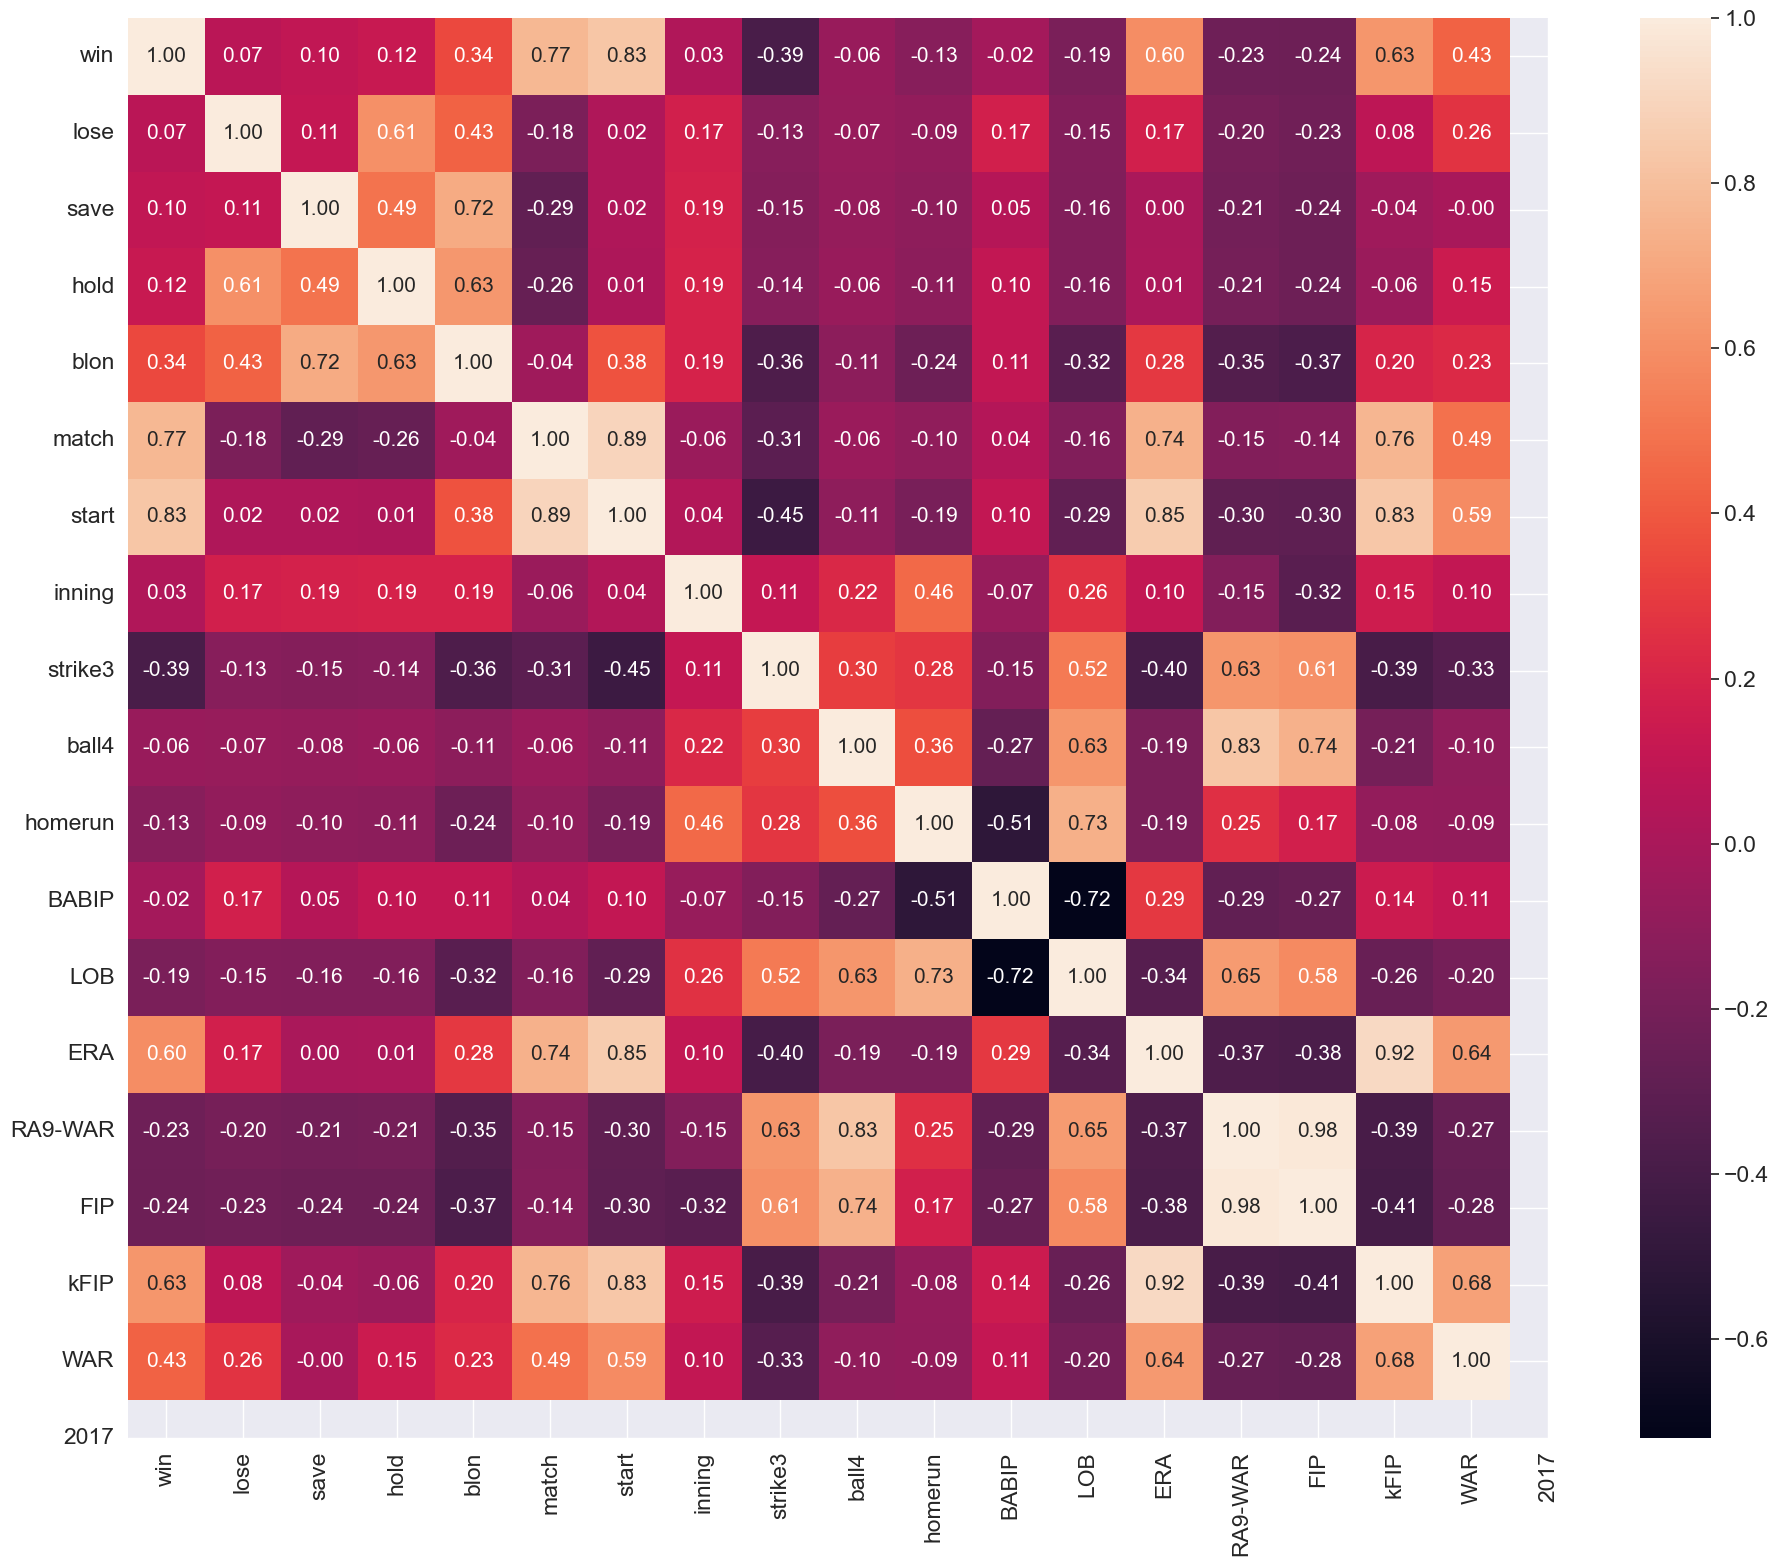

In [58]:
import seaborn as sns

# 피처간의 상관계수 행렬을 계산합니다.
corr = picher_df[scale_columns].corr(method='pearson')
show_cols = ['win', 'lose', 'save', 'hold', 'blon', 'match', 'start', 
             'inning', 'strike3', 'ball4', 'homerun', 'BABIP', 'LOB', 
             'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '2017']

# corr 행렬 히트맵을 시각화합니다.
plt.rc('font', family='NanumGothicOTF')
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=show_cols,
            xticklabels=show_cols)

plt.tight_layout()
plt.show()

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
# 피처마다의 VIF 계수를 출력합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,3.2,BABIP
1,10.6,ERA
2,14194.6,FIP
3,1.7,KIA
4,1.9,KT
5,1.7,LG
6,4.3,LOB%
7,1.5,NC
8,12.9,RA9-WAR
9,1.8,SK


In [61]:
# 피처를 재선정합니다.
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [62]:
# 모델을 학습합니다.
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [63]:
# 결과를 출력합니다.
print(model.score(X_train, y_train)) # train R2 score를 출력합니다.
print(model.score(X_test, y_test)) # test R2 score를 출력합니다.

0.6476276055686914
0.7824380698374459


In [64]:
# 회귀 분석 모델을 평가합니다.
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력합니다.
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력합니다.

2.137887813100842
2.175530772840939


In [65]:
# 피처마다의 VIF 계수를 출력합니다.
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,1.9,FIP
1,2.1,WAR
2,1.9,볼넷/9
3,1.1,삼진/9
4,1.9,연봉(2017)


In [69]:
# 2017년 승수을 예측하여 데이터프레임의 column으로 생성합니다.
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
predict_2017_winning_rate = lr.predict(X)
picher_df['예측승수'] = pd.Series(predict_2017_winning_rate)

In [72]:
# 원래의 데이터 프레임을 다시 로드합니다.
picher = pd.read_csv(picher_file_path)
picher = picher[['선수명', '승']]

# 원래의 데이터 프레임에 2018년 연봉 정보를 합칩니다.
result_df = picher_df.sort_values(by=['y'], ascending=False)
result_df.drop(['승'], axis=1, inplace=True, errors='ignore')
result_df = result_df.merge(picher, on=['선수명'], how='left')
result_df = result_df[['선수명', 'y', '예측승수']]
result_df.columns = ['선수명', '승', '예측승수']

# 재계약 이후 승수가 변화한 경우만 관찰합니다.
result_df = result_df[result_df['예측승수'] != result_df['승']]
result_df = result_df.reset_index()
result_df = result_df.iloc[:10, :]
result_df.head(10)

,index,선수명,승,예측승수
0,0,양현종,20,14.636519
1,1,켈리,16,15.880422
2,2,장원준,14,10.506484
3,3,레일리,13,11.577155
4,4,박종훈,12,5.132233
5,5,윤성환,12,8.994516
6,6,박세웅,12,7.101436
7,7,유희관,11,8.412746
8,8,송승준,11,6.691600
9,9,소사,11,14.495643
